#Foreword

In this lab we are exploring the concept of 2D convolution in the realm of deep learning (the mathematical definition of convolution is slightly different).

A convolution is an operation between an image and a filter. From the code perspective, both entities are matrices, with the image usually being much bigger than the filter, which "strides around" the matrix. The filter has a specific geometrical meaning.

Filters ara also called "kernels" in some deep learning frameworks.

# A simple filter (aka kernel)

Let's define a simple 3x3 filter and plot it. Remember the concept of [Colormap in pyploy](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and that you can reverse the main maps [adding "_r" to the map name](https://matplotlib.org/stable/api/pyplot_summary.html).

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


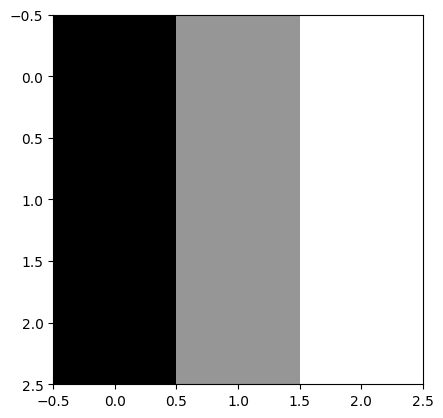

In [1]:
import numpy
from matplotlib import pyplot

filter = numpy.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

filter_R = numpy.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filter_G = numpy.array([[-1, 5, 1], [-1, 0, 1], [-1, 0, 1]])
filter_B = numpy.array([[-8, 0, 1], [-2, 22, 1], [-1, 0, 1]])

print(filter)
pyplot.imshow(filter, cmap = 'Greys_r')

# A simple test image

We'll start our convolution on a synthetic image: a black field with two white rectangles.

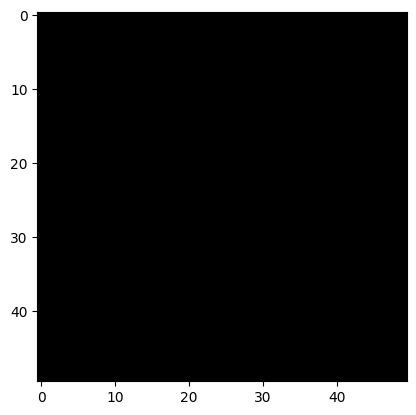

In [2]:
#define a 50x50 black image
img = numpy.zeros((50, 50))

#taking a look
pyplot.imshow(img, cmap = 'Greys_r')

A small support function to programmatically add rectangles to the image.

In [3]:
def draw_rectangle(img, x1, y1, x2, y2, color = 255):
    img[x1:(x2+1), y1] = color
    img[x1:(x2+1), y2] = color
    img[x1, y1:(y2+1)] = color
    img[x2, y1:(y2+1)] = color

    return(img)

Let's test the function.

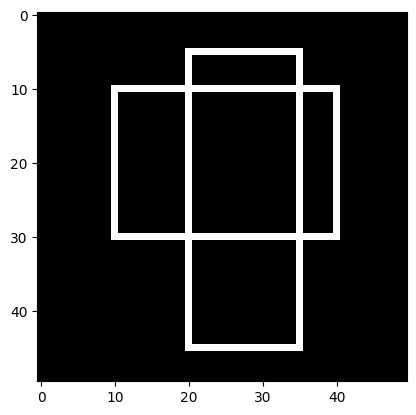

In [4]:
#adding two rectangles
img = draw_rectangle(img, 10, 10, 30, 40)
img = draw_rectangle(img, 5,  20, 45, 35)

#taking a look
pyplot.imshow(img, cmap = 'Greys_r')

# Convolution, by hand

For this first time let's just do the convolution between our image and the known 3x3 filter. Remember the definition of convolution: a striding window of sums of element-wise multiplications.

(48, 48)


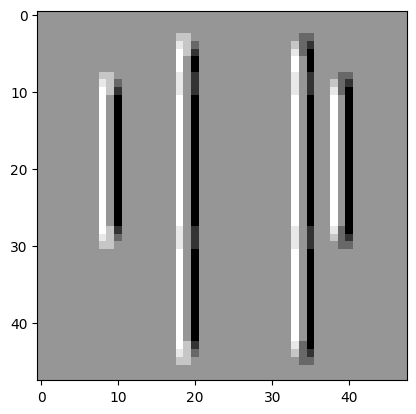

In [5]:
#original image size
w_orig, h_orig = img.shape

#size after convolution
w = w_orig - 2
h = h_orig - 2

#room for result
res = numpy.zeros((w, h))

#two for loops that swipe the whole image
for i in range(0, w):
    for j in range(0, h):
        #extract image subset
        piece = img[i:(i+3), j:(j+3)]

        #convolute
        conv = sum(sum(piece * filter))

        #store the result
        res[i, j] = conv

#taking a look
print(res.shape)
pyplot.imshow(res, cmap = 'Greys_r')

# Let's be smart: a convolution function

The previous snippet worked only with the known filter, but we want a general solution. Let's define a function that takes in an image and a filter of any size and returns the convolution result.

In [6]:
def convolve(img, filter, stride=1):
    #original image size
    w_orig, h_orig = img.shape

    #filter size
    w_filter, h_filter = filter.shape

    #size after convolution
    w = w_orig - (w_filter - 1)
    h = h_orig - (h_filter - 1)

    #room for result
    res = numpy.zeros((w, h))

    #spanning result image width
    for i in range(0, w, stride):
        #spanning result image heigth
        for j in range(0, h, stride):
            #extract image subset
            piece = img[i:(i+w_filter), j:(j+h_filter)]

            #convolve the selected area and the filter,
            #store the result
            res[i, j] = sum(sum(piece * filter))

    #and we are done
    return(res)

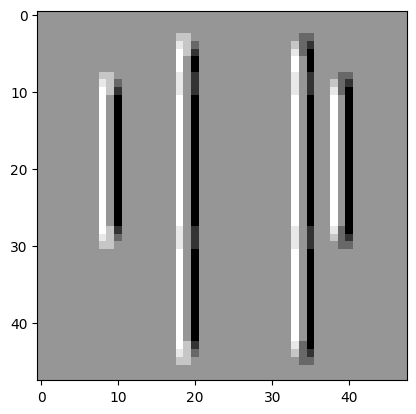

In [7]:
pyplot.imshow(convolve(img, filter), cmap = 'Greys_r')

#Let's work with a true image...

Our syntetic image it's easy to understand but can only bring us so far. It's time to apply our convolution to a real image.

(362, 800, 3)


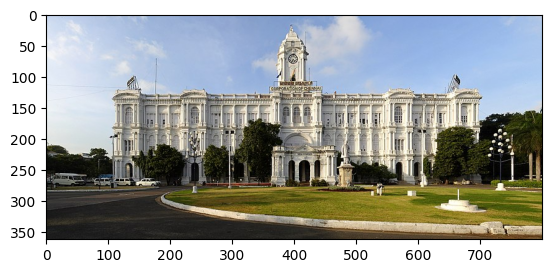

In [8]:
img_url = 'https://raw.githubusercontent.com/ne1s0n/coding_excercises/master/data/Ripon_Building_panorama.jpg'

import requests          #required for remote access via urls
from PIL import Image    # PIL is Pillow Module, for image manipulation
from numpy import asarray

#requests + numpy: fast image loading
response = requests.get(img_url, stream=True) #you may want to check response.status_code
img = asarray(Image.open(response.raw))

#dimensions of the image
print(img.shape)

#and let's take a look at it
pyplot.imshow(img)

#...but let's keep it simple: only black and white

We are still starting to play with convolution, and have the right to simplify the problem. Let's just work with black and white images.

(362, 800)


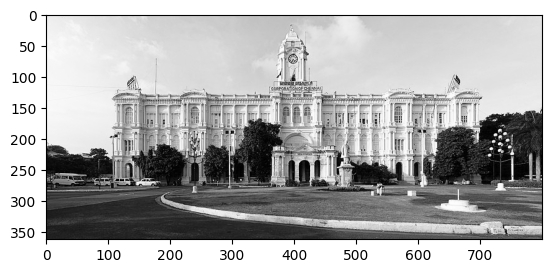

In [9]:
#to B/W
img = img.mean(2)

#dimensions of the image
print(img.shape)

#and let's take a look at it
pyplot.imshow(img, cmap = 'Greys_r')

It's time to test our convolution. Let's print the original image, the filter, and the convolved result side by side.

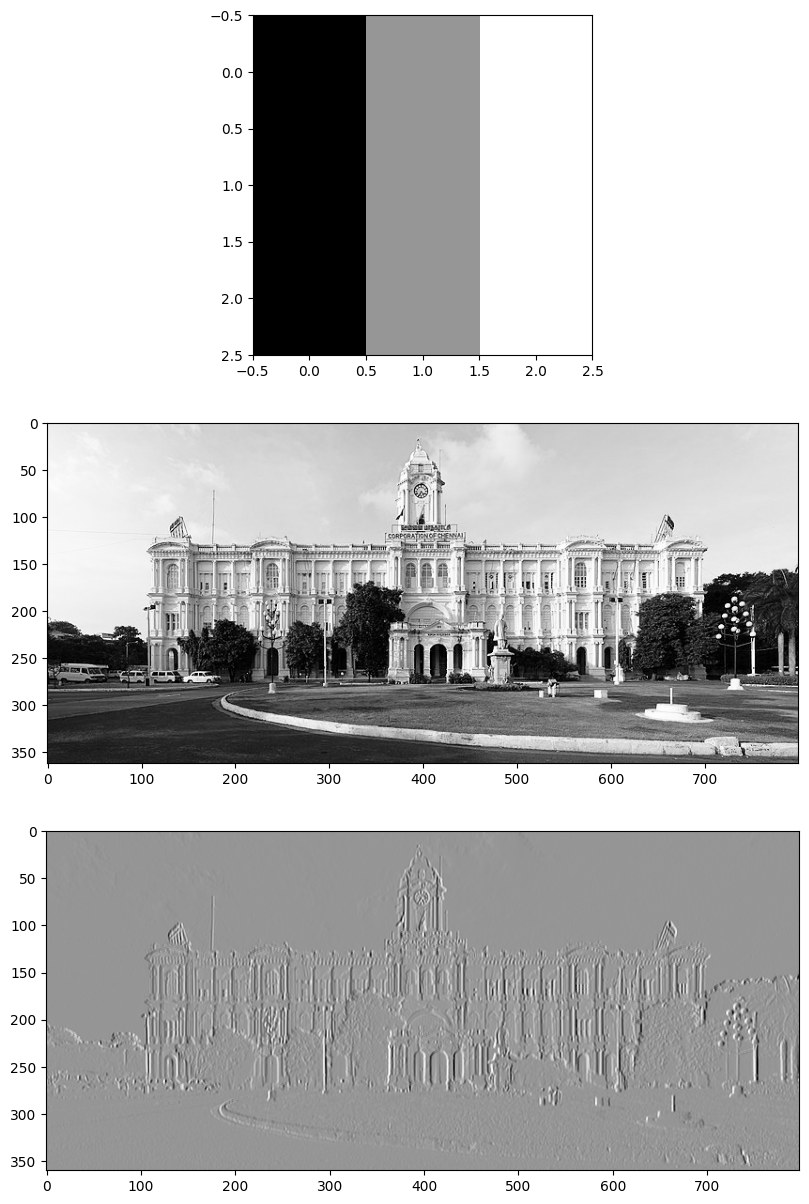

In [10]:
#big figure, default size is tiny in this case and we increase it a bit
fig=pyplot.figure(figsize=(10, 15))

fig.add_subplot(3,1,1)
pyplot.imshow(filter, cmap = 'Greys_r')

fig.add_subplot(3,1,2)
pyplot.imshow(img, cmap = 'Greys_r')

fig.add_subplot(3,1,3)
pyplot.imshow(convolve(img, filter), cmap = 'Greys_r')

pyplot.show()

#Another filter!

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


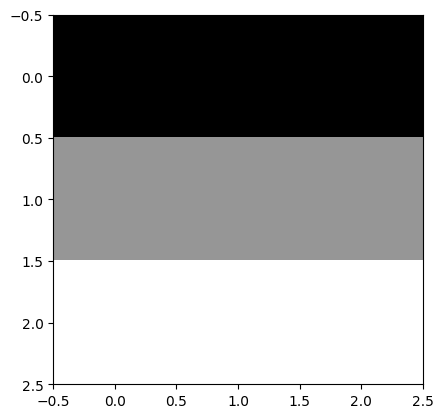

In [11]:
filter2 = numpy.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
print(filter2)
pyplot.imshow(filter2, cmap = 'Greys_r')

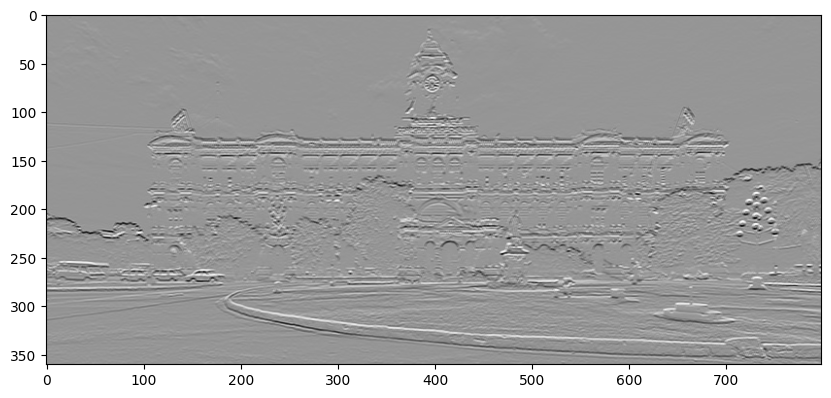

In [12]:
fig=pyplot.figure(figsize=(10, 15))
pyplot.imshow(convolve(img, filter2), cmap = 'Greys_r')

# And another, bigger one

Our function is not limited to 3x3 filters. Let's feed it a bigger one and let's see what happens.

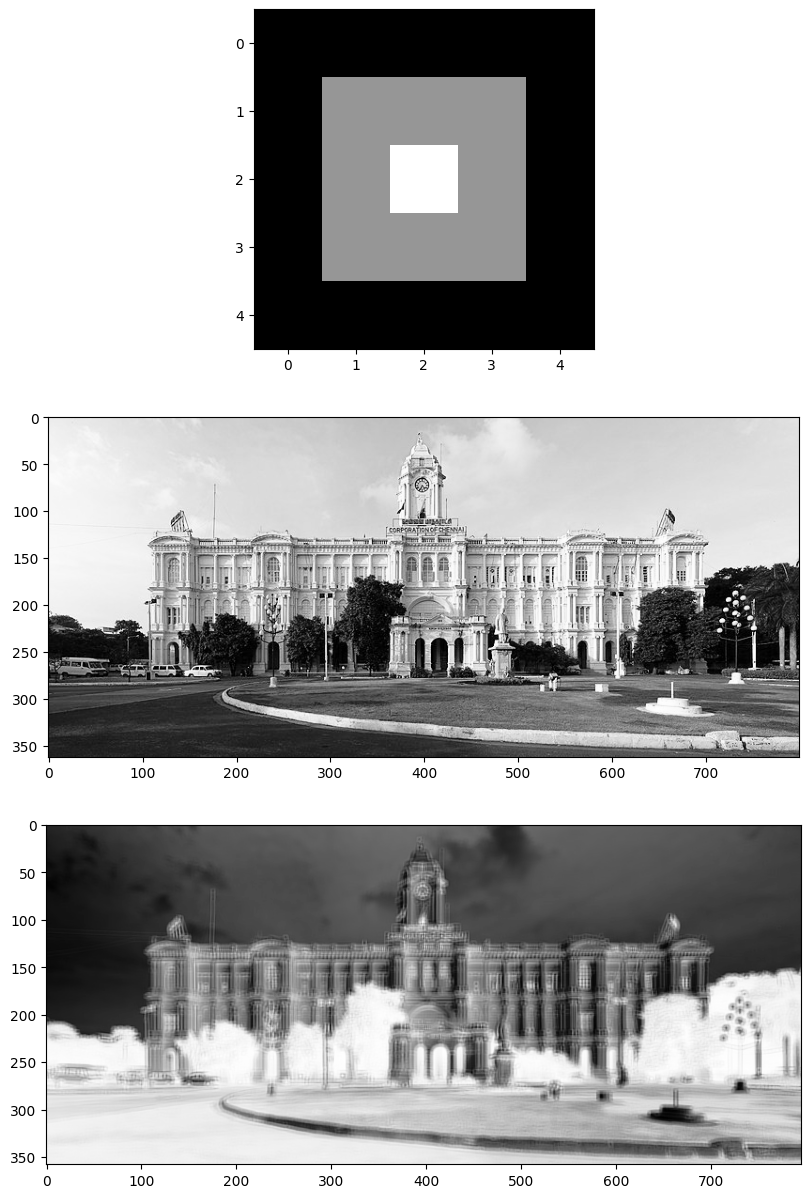

In [13]:
#define the filter
filter3 = numpy.array([
                       [-1, -1, -1, -1, -1],
                       [-1,  0,  0,  0, -1],
                       [-1,  0,  1,  0, -1],
                       [-1,  0,  0,  0, -1],
                       [-1, -1, -1, -1, -1]])

#multiplot with filter, original image and convolution
fig=pyplot.figure(figsize=(10, 15))

fig.add_subplot(3,1,1)
pyplot.imshow(filter3, cmap = 'Greys_r')

fig.add_subplot(3,1,2)
pyplot.imshow(img, cmap = 'Greys_r')

fig.add_subplot(3,1,3)
pyplot.imshow(convolve(img, filter3), cmap = 'Greys_r')

pyplot.show()

# Open questions

* how to expand the `convolve()` function so that it accepts also a `stride` argument?
* what is required to convolve a three channel RGB image? What about an arbitrary number of channels?

# Max pooling

In [14]:
#original image size
w_orig, h_orig = img.shape

#size after max pooling
w = int(numpy.floor(w_orig / 2))
h = int(numpy.floor(h_orig / 2))

#room for result
res = numpy.zeros((w, h))

#two for loops that swipe the whole image
for i in range(0, w):
    for j in range(0, h):
        #extract image subset
        piece = img[2*i:(2*i+2), 2*j:(2*j+2)]

        #max pool
        res[i, j] = numpy.max(piece)



(362, 800)


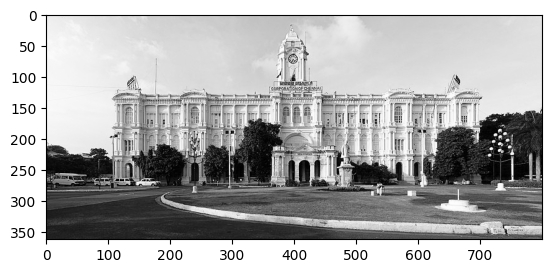

In [15]:
#printing the original image
print(img.shape)
pyplot.imshow(img, cmap = 'Greys_r')

(181, 400)


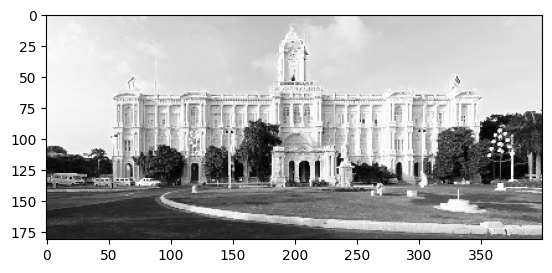

In [16]:
#the maxpooled
print(res.shape)
pyplot.imshow(res, cmap = 'Greys_r')